# Introduction - Programming for Data Analysis Project 2018 
---------------
### Data simulation for suicide rates in Ireland
--------------------------------


This report focused on the suicide rates and the factors contributing to suicide in Ireland. 
According to the national suicide reasearch foundation, the factors contributuing to suicides amougest males and females are depression,drugs,alcohol,working in the construction/production sector,psychiatric disorder and marital status(1).

Utilising data generated by the World Health Organisation (1) and the central statistics office (2), I obtained the probabilites of suicide for different age brackets and genders within Ireland. 

Further research from the central statistics office, identified marital status to be contributing factor.Marital status based on age and gender was added to the data obtained from the World Health Organisations data. 

A dataset was simulated that was representative of the observed probabilites and relationships between the variables.


## Part 1
------------
### Importing and generating insights from WHO and central statistics office data
--------------------------------------------------------------------------------------------------

### 1) Read in your datasets and all packages you will need to analyse your data.

In [10]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


# Allow juypter to print an interactive output.(https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Enhance plot resolution for retina display

#Read in csv file for suicide rates by country
df = pd.read_csv("suiciderate.csv") 
#Read in csv file for marital status in Ireland 
df1 = pd.read_csv("marital_status.csv")

### 2) Look at your data to ensure it is accurate and remove any incomplete or missing data

In [11]:
#Print first 5x rows of data
df.head()
df1.head()
#Remove rows where data for suicidesrates and marital_status is incomplete/missing
emptyidx = pd.isnull(df)
if np.sum(np.sum(emptyidx)) > 0:
    data = df.dropna() 
emptyidx = pd.isnull(df1)
if np.sum(np.sum(emptyidx)) > 0:
    data1 = df1.dropna()    
#Print datatypes for suicidesrates data
types = pd.DataFrame(data.dtypes)
types 
#Print datatypes for marital status data
types1 = pd.DataFrame(df1.dtypes)
types1 

,country,year,sex,age,suicides_no,population,Unnamed: 6
0,Albania,1905,female,15-24 years,NaN,277900.0,NaN
1,Albania,1905,female,25-34 years,NaN,246800.0,NaN
2,Albania,1905,female,35-54 years,NaN,267500.0,NaN
3,Albania,1905,female,5-14 years,NaN,298300.0,NaN
4,Albania,1905,female,55-74 years,NaN,138700.0,NaN


,sex,age,population,status,age_bucket,probability
0,Male,1,31876,Single,0-4 years,0.51
1,Male,1,32824,Single,0-4 years,0.51
2,Male,2,34031,Single,0-4 years,0.51
3,Male,3,34785,Single,0-4 years,0.51
4,Male,4,36215,Single,0-4 years,0.51


,0
country,object
year,int64
sex,object
age,object
suicides_no,float64
population,float64
Unnamed: 6,object


,0
sex,object
age,int64
population,int64
status,object
age_bucket,object
probability,float64


### 3) Run descriptive statisitics to get more insights about your dataset

In [12]:
#Generate descriptive statistics for suiciderates data
des = data.describe()
des 
##Generate descriptive statistics for marital_status data
des1 = df1.describe()
des1

,year,suicides_no,population
count,432.0,432.000000,432.000000
mean,1905.0,32.314815,295502.976852
std,0.0,37.031597,125164.841038
min,1905.0,0.000000,52100.000000
25%,1905.0,4.000000,251525.000000
50%,1905.0,18.000000,302098.000000
75%,1905.0,48.250000,342225.000000
max,1905.0,192.000000,678830.000000


,age,population,probability
count,808.000000,808.000000,808.000000
mean,50.009901,5893.397277,0.445545
std,29.155990,9321.366464,0.195263
min,1.000000,0.000000,0.000000
25%,25.000000,76.500000,0.400000
50%,50.000000,1340.500000,0.490000
75%,75.000000,5711.500000,0.540000
max,100.000000,37033.000000,0.780000


### 4) Filter your data  
As the WHO dataset contains data for all countries we will filter for data relating to Ireland.

In [13]:
ireland = data['country']=='Ireland'
x = data[ireland]
des = x.describe()
print(des)

         year  suicides_no     population
count   432.0   432.000000     432.000000
mean   1905.0    32.314815  295502.976852
std       0.0    37.031597  125164.841038
min    1905.0     0.000000   52100.000000
25%    1905.0     4.000000  251525.000000
50%    1905.0    18.000000  302098.000000
75%    1905.0    48.250000  342225.000000
max    1905.0   192.000000  678830.000000


### 5) Plot your data to get more insights about your data

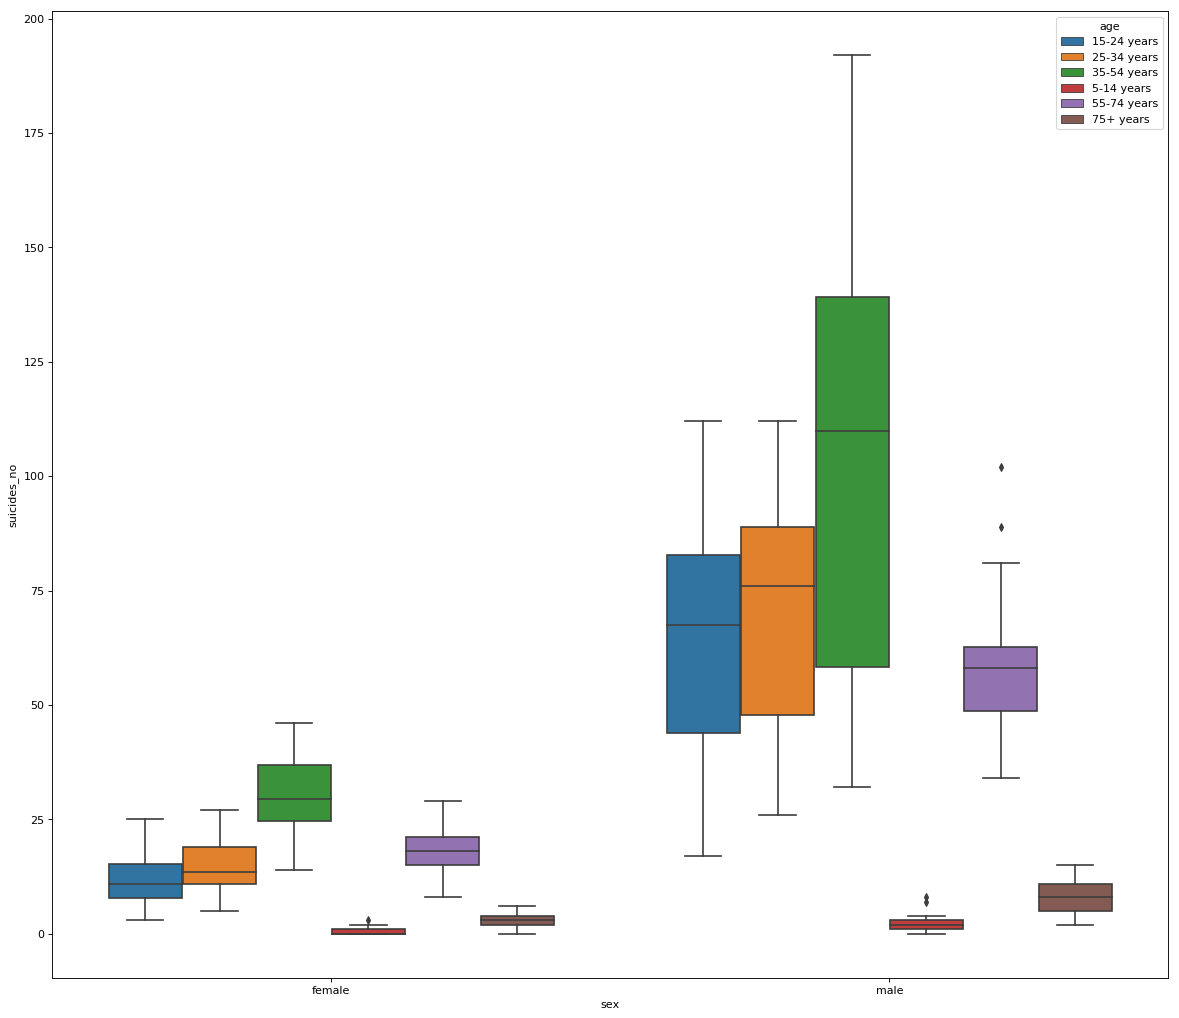

In [14]:
#Make graph appear larger
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
#Plot sex,suicides and age on boxplot
sns.boxplot(x='sex',y='suicides_no',data=x,hue='age')


## Part 2 
### Simulate Irish population data based on probabilites and relationships between variables.

### 1) Generate sample age data based on probabilites as catagorised in World Health Organisations data.
------------------------------------------------------------------


In [15]:
#Import packages
import random
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Assign age buckets to list 1-5, assign age bucket probabilities and set number of datapoints required
age_cat ,probabilities,num_sample = [1,2,3,4,5,6],[0.12,0.16,0.31,0.15,0.20,0.06],500000

# Set seed to reproduce the same data 
np.random.seed(123)

#Generate random data based on emperical probabilities identified in the world health organisation survey
y =np.random.choice(age_cat,size =num_sample,p =probabilities)

#Create dataframe from numpy array and display first 5 lines.
pd.DataFrame(y).head(5) 

,0
0,4
1,3
2,2
3,3
4,4


### 2) Generate random age data between 5 - 100,gender and suicides

In [16]:
#Generate random integer ages for each age category given the above calculated category size

#Create dataframe from numpy array and display first 10 lines.
pd.DataFrame(y).head(10)

# Generate random data using random.randint (start,stop,size)
#Randon Radint - https://stackoverflow.com/questions/3996904/generate-random-integers-between-0-and-9
age1 = np.random.randint(5,15,len(y[y==1]))
age2 = np.random.randint(15,25,len(y[y==2]))      
age3 = np.random.randint(25,34,len(y[y==3]))
age4 = np.random.randint(35,54,len(y[y==4]))
age5 = np.random.randint(55,74,len(y[y==5]))
age6 = np.random.randint(75,100,len(y[y==6]))  


#Reshape data from a 1D array to a 2D array for age buckets 
#1d-2d array - https://stackoverflow.com/questions/12575421/convert-a-1d-array-to-a-2d-array-in-numpy
age1 = age1.reshape(age1.shape[0],-1)
age2 = age2.reshape(age2.shape[0],-1) 
age3 = age3.reshape(age3.shape[0],-1) 
age4 = age4.reshape(age4.shape[0],-1) 
age5 = age5.reshape(age5.shape[0],-1)
age6 = age6.reshape(age6.shape[0],-1)


#Generate random gender for each age category given the above calculated category size
gender,probabilites,number_sample = ["m","f"],[0.51,0.49],len(age1)
gender1 = np.random.choice(gender,size = number_sample, p = probabilites)
gender,probabilites,number_sample = ["m","f"],[0.51,0.49],len(age2)
gender2 = np.random.choice(gender,size = number_sample, p = probabilites)
gender,probabilites,number_sample = ["m","f"],[0.50,0.50],len(age3)
gender3 = np.random.choice(gender,size = number_sample, p = probabilites)
gender,probabilites,number_sample = ["m","f"],[0.49,0.51],len(age4)
gender4 = np.random.choice(gender,size = number_sample, p = probabilites)
gender,probabilites,number_sample = ["m","f"],[0.51,0.49],len(age5)
gender5 = np.random.choice(gender,size = number_sample, p = probabilites)
gender,probabilites,number_sample = ["m","f"],[0.42,0.58],len(age6)
gender6 = np.random.choice(gender,size = number_sample, p = probabilites) 

#Reshape data from a 1D array to a 2D array for all gender age buckets
gender1 = gender1.reshape(gender1.shape[0],-1)
gender2 = gender2.reshape(gender2.shape[0],-1)
gender3 = gender3.reshape(gender3.shape[0],-1)
gender4 = gender4.reshape(gender4.shape[0],-1)
gender5 = gender5.reshape(gender5.shape[0],-1)
gender6 = gender6.reshape(gender6.shape[0],-1)



#Generate probability of sucide for gender given age bracket
suicide,probabilites,number_sample = [1,0],[0.00000596,1-0.00000596],len(gender1[gender1 =="m"])
suicidie_M1 = np.random.choice(suicide,size = number_sample, p = probabilites) 
suicide,probabilites,number_sample = [1,0],[0.00023540,1-0.00023540],len(gender2[gender2 =="m"])
suicidie_M2 = np.random.choice(suicide,size = number_sample, p = probabilites) 
suicide,probabilites,number_sample = [1,0],[0.00023670,1-0.00023670],len(gender3[gender3 =="m"])
suicidie_M3 = np.random.choice(suicide,size = number_sample, p = probabilites) 
suicide,probabilites,number_sample = [1,0],[0.00024409,1-0.00024409],len(gender4[gender4 =="m"])
suicidie_M4 = np.random.choice(suicide,size = number_sample, p = probabilites) 
suicide,probabilites,number_sample = [1,0],[0.00019215,1-0.00019215],len(gender5[gender5 =="m"])
suicidie_M5 = np.random.choice(suicide,size = number_sample, p = probabilites) 
suicide,probabilites,number_sample = [1,0],[0.00007749,1-0.00007749],len(gender6[gender6 =="m"])
suicidie_M6 = np.random.choice(suicide,size = number_sample, p = probabilites) 
suicide,probabilites,number_sample = [1,0],[0.0,1-0.0],len(gender1[gender1 =="f"])
suicidie_F1 = np.random.choice(suicide,size = number_sample, p = probabilites) 
suicide,probabilites,number_sample = [1,0],[0.00004214,1-0.00004214],len(gender2[gender2 =="f"])
suicidie_F2 = np.random.choice(suicide,size = number_sample, p = probabilites) 
suicide,probabilites,number_sample = [1,0],[0.00005660,1-0.00005660],len(gender3[gender3 =="f"])
suicidie_F3 = np.random.choice(suicide,size = number_sample, p = probabilites) 
suicide,probabilites,number_sample = [1,0],[0.00005745,1-0.00005745],len(gender4[gender4 =="f"])
suicidie_F4 = np.random.choice(suicide,size = number_sample, p = probabilites) 
suicide,probabilites,number_sample = [1,0],[0.00003466,1-0.00003466],len(gender5[gender5 =="f"])
suicidie_F5 = np.random.choice(suicide,size = number_sample, p = probabilites) 
suicide,probabilites,number_sample = [1,0],[0.00001414,1-0.00001414],len(gender6[gender6 =="f"])
suicidie_F6 = np.random.choice(suicide,size = number_sample, p = probabilites) 

#Reshape data from a 1D array to a 2D array - 
suicidie_M1 = suicidie_M1.reshape(suicidie_M1.shape[0],-1)
suicidie_M2 = suicidie_M2.reshape(suicidie_M2.shape[0],-1)
suicidie_M3 = suicidie_M3.reshape(suicidie_M3.shape[0],-1)
suicidie_M4 = suicidie_M4.reshape(suicidie_M4.shape[0],-1)
suicidie_M5 = suicidie_M5.reshape(suicidie_M5.shape[0],-1)
suicidie_M6 = suicidie_M6.reshape(suicidie_M6.shape[0],-1)
suicidie_F1 = suicidie_F1.reshape(suicidie_F1.shape[0],-1)
suicidie_F2 = suicidie_F2.reshape(suicidie_F2.shape[0],-1)
suicidie_F3 = suicidie_F3.reshape(suicidie_F3.shape[0],-1)
suicidie_F4 = suicidie_F4.reshape(suicidie_F4.shape[0],-1)
suicidie_F5 = suicidie_F5.reshape(suicidie_F5.shape[0],-1)
suicidie_F6 = suicidie_F6.reshape(suicidie_F6.shape[0],-1)


,0
0,4
1,3
2,2
3,3
4,4
5,3
6,6
7,4
8,3
9,3


### 3)Put all randomly generated data into one dataframe

In [17]:
#Generate a column of zeros the lenght of variable age1
zeros = np.zeros((len(age1),1))  

# Concatenate suicide,gender and age and repeat this for each age group 1-5.
Total_data1 = pd.DataFrame(np.concatenate([age1,gender1,zeros],axis = 1),columns=['Age', 'Sex', 'Suicide'])
Total_data1.Suicide[Total_data1.Sex == 'm'] = suicidie_M1
Total_data1.Suicide[Total_data1.Sex == 'f'] = suicidie_F1
zeros = np.zeros((len(age2),1))
Total_data2 = pd.DataFrame(np.concatenate([age2,gender2,zeros],axis = 1),columns=['Age', 'Sex', 'Suicide'])
Total_data2.Suicide[Total_data2.Sex == 'm'] = suicidie_M2
Total_data2.Suicide[Total_data2.Sex == 'f'] = suicidie_F2
zeros = np.zeros((len(age3),1))
Total_data3 = pd.DataFrame(np.concatenate([age3,gender3,zeros],axis = 1),columns=['Age', 'Sex', 'Suicide'])
Total_data3.Suicide[Total_data3.Sex == 'm'] = suicidie_M3
Total_data3.Suicide[Total_data3.Sex == 'f'] = suicidie_F3
zeros = np.zeros((len(age4),1))
Total_data4 = pd.DataFrame(np.concatenate([age4,gender4,zeros],axis = 1),columns=['Age', 'Sex', 'Suicide'])
Total_data4.Suicide[Total_data4.Sex == 'm'] = suicidie_M4
Total_data4.Suicide[Total_data4.Sex == 'f'] = suicidie_F4
zeros = np.zeros((len(age5),1))
Total_data5 = pd.DataFrame(np.concatenate([age5,gender5,zeros],axis = 1),columns=['Age', 'Sex', 'Suicide'])
Total_data5.Suicide[Total_data5.Sex == 'm'] = suicidie_M5
Total_data5.Suicide[Total_data5.Sex == 'f'] = suicidie_F5
zeros = np.zeros((len(age6),1))
Total_data6 = pd.DataFrame(np.concatenate([age6,gender6,zeros],axis = 1),columns=['Age', 'Sex', 'Suicide'])
Total_data6.Suicide[Total_data6.Sex == 'm'] = suicidie_M6
Total_data6.Suicide[Total_data6.Sex == 'f'] = suicidie_F6 


### 4) Assign marital status obtained from the CSO to the WHO dataset using probabilities from the CSO. 

To assign martial status to our dataset, we used but the known 
probability of the being single or married from CSO data and also the martial
status of those who died from suicide in Ireland from the WHO.

In [18]:
#Generate maritial status for those who die of suicide in ireland based on  probability of gender 
# 1 = Not Single , 0 = Single
marital_status,probabilites,number_sample = [0,1],[1,0],sum(suicidie_M1)
marital_status_M1 = np.random.choice(marital_status,size = number_sample, p = probabilites) 
marital_status,probabilites,number_sample = [0,1],[0.47,0.53],sum(suicidie_M2)
marital_status_M2 = np.random.choice(marital_status,size = number_sample, p = probabilites) 
marital_status,probabilites,number_sample = [0,1],[0.59,0.41],sum(suicidie_M3)
marital_status_M3 = np.random.choice(marital_status,size = number_sample, p = probabilites) 
marital_status,probabilites,number_sample = [0,1],[0.59,0.41],sum(suicidie_M4)
marital_status_M4 = np.random.choice(marital_status,size = number_sample, p = probabilites) 
marital_status,probabilites,number_sample = [0,1],[0.59,0.41],sum(suicidie_M5)
marital_status_M5 = np.random.choice(marital_status,size = number_sample, p = probabilites) 
marital_status,probabilites,number_sample = [0,1],[0.59,0.41],sum(suicidie_M6)
marital_status_M6 = np.random.choice(marital_status,size = number_sample, p = probabilites) 
marital_status,probabilites,number_sample = [0,1],[1,0],sum(suicidie_F1)
marital_status_F1 = np.random.choice(marital_status,size = number_sample, p = probabilites)
marital_status,probabilites,number_sample = [0,1],[0.64,0.36],sum(suicidie_F2)
marital_status_F2 = np.random.choice(marital_status,size = number_sample, p = probabilites)
marital_status,probabilites,number_sample = [0,1],[0.55,0.45],sum(suicidie_F3)
marital_status_F3 = np.random.choice(marital_status,size = number_sample, p = probabilites)
marital_status,probabilites,number_sample = [0,1],[0.55,0.45],sum(suicidie_F4)
marital_status_F4 = np.random.choice(marital_status,size = number_sample, p = probabilites)
marital_status,probabilites,number_sample = [0,1],[0.55,0.45],sum(suicidie_F5)
marital_status_F5 = np.random.choice(marital_status,size = number_sample, p = probabilites)
marital_status,probabilites,number_sample = [0,1],[0.55,0.45],sum(suicidie_F6)
marital_status_F6 = np.random.choice(marital_status,size = number_sample, p = probabilites)

### 5) Add marital status 

The probability of martial status is known at a population level for those who die from suicide,
however the breakdown by age is not known. Despite this limitation, the overall martial status probability 
for does who died from suicide is applied to all subject over the age of 17 in accordance with the CSO marriage age brackets.

In [19]:
#Reshape data from a 1D array to a 2D array and add Martial Status to Total Data for those who died of sucicide.
# Suicide may not be observed in every age/gender bracket and throws an error.
# 1 = Not Single , 0 = Single


if len(marital_status_M1) > 0:
    marital_status_M1 = marital_status_M1.reshape(marital_status_M1.shape[0],-1)
    zeros = pd.DataFrame(np.zeros((len(age1),1)),columns = ['Marital_Status']) 
    Total_data1 = pd.concat([Total_data1,zeros], axis = 1)
    Total_data1.Marital_Status[(Total_data1.Suicide == 1) & (Total_data1.Sex == 'm')] = marital_status_M1
else:
    zeros = pd.DataFrame(np.zeros((len(age1),1)),columns = ['Marital_Status'])  
    Total_data1 = pd.concat([Total_data1,zeros], axis = 1)
if len(marital_status_M2) > 0:
    marital_status_M2 = marital_status_M2.reshape(marital_status_M2.shape[0],-1)
    zeros = pd.DataFrame(np.zeros((len(age2),1)),columns = ['Marital_Status'])  
    Total_data2 = pd.concat([Total_data2,zeros], axis = 1)
    Total_data2.Marital_Status[(Total_data2.Suicide == 1) & (Total_data2.Sex == 'm')] = marital_status_M2
else:
    zeros = pd.DataFrame(np.zeros((len(age2),1)),columns = ['Marital_Status']) 
    Total_data2 = pd.concat([Total_data2,zeros], axis = 1)    
if len(marital_status_M3) > 0:
    marital_status_M3 = marital_status_M3.reshape(marital_status_M3.shape[0],-1)
    zeros = pd.DataFrame(np.zeros((len(age3),1)),columns = ['Marital_Status'])  
    Total_data3 = pd.concat([Total_data3,zeros], axis = 1)
    Total_data3.Marital_Status[(Total_data3.Suicide == 1) & (Total_data3.Sex == 'm')] = marital_status_M3
else:
    zeros = pd.DataFrame(np.zeros((len(age1),1)),columns = ['Marital_Status'])  
    Total_data3 = pd.concat([Total_data3,zeros], axis = 1)
if len(marital_status_M4) > 0:
    marital_status_M4 = marital_status_M4.reshape(marital_status_M4.shape[0],-1)
    zeros = pd.DataFrame(np.zeros((len(age4),1)),columns = ['Marital_Status']) 
    Total_data4 = pd.concat([Total_data4,zeros], axis = 1)
    Total_data4.Marital_Status[(Total_data4.Suicide == 1) & (Total_data4.Sex == 'm')] = marital_status_M4
else:
    zeros = pd.DataFrame(np.zeros((len(age4),1)),columns = ['Marital_Status'])  
    Total_data4 = pd.concat([Total_data4,zeros], axis = 1)
if len(marital_status_M5) > 0:
    marital_status_M5 = marital_status_M5.reshape(marital_status_M5.shape[0],-1)
    zeros = pd.DataFrame(np.zeros((len(age5),1)),columns = ['Marital_Status'])  
    Total_data5 = pd.concat([Total_data5,zeros], axis = 1)
    Total_data5.Marital_Status[(Total_data5.Suicide == 1) & (Total_data5.Sex == 'm')] = marital_status_M5
else:
    zeros = pd.DataFrame(np.zeros((len(age5),1)),columns = ['Marital_Status']) 
    Total_data5 = pd.concat([Total_data5,zeros], axis = 1)
if len(marital_status_M6) > 0:
    marital_status_M6 = marital_status_M6.reshape(marital_status_M6.shape[0],-1)
    zeros = pd.DataFrame(np.zeros((len(age6),1)),columns = ['Marital_Status']) 
    Total_data6 = pd.concat([Total_data6,zeros], axis = 1)
    Total_data6.Marital_Status[(Total_data6.Suicide == 1) & (Total_data6.Sex == 'm')] = marital_status_M6
else:
    zeros = pd.DataFrame(np.zeros((len(age6),1)),columns = ['Marital_Status']) 
    Total_data6 = pd.concat([Total_data6,zeros], axis = 1)
     
 # Repeat for females       
if len(marital_status_F1) > 0:
    marital_status_F1 = marital_status_F1.reshape(marital_status_F1.shape[0],-1)
    Total_data1.Marital_Status[(Total_data1.Suicide == 1) & (Total_data1.Sex == 'f')] = marital_status_F1
if len(marital_status_F2) > 0:
    marital_status_F2 = marital_status_F2.reshape(marital_status_F2.shape[0],-1)
    Total_data2.Marital_Status[(Total_data2.Suicide == 1) & (Total_data2.Sex == 'f')] = marital_status_F2   
if len(marital_status_F3) > 0:
    marital_status_F3 = marital_status_F3.reshape(marital_status_F3.shape[0],-1)
    Total_data3.Marital_Status[(Total_data3.Suicide == 1) & (Total_data3.Sex == 'f')] = marital_status_F3
if len(marital_status_F4) > 0:
    marital_status_F4 = marital_status_F4.reshape(marital_status_F4.shape[0],-1)
    Total_data4.Marital_Status[(Total_data4.Suicide == 1) & (Total_data4.Sex == 'f')] = marital_status_F4
if len(marital_status_F5) > 0:
    marital_status_F5 = marital_status_F5.reshape(marital_status_F5.shape[0],-1)
    Total_data5.Marital_Status[(Total_data5.Suicide == 1) & (Total_data5.Sex == 'f')] = marital_status_F5
if len(marital_status_F6) > 0:
    marital_status_F6 = marital_status_F6.reshape(marital_status_F6.shape[0],-1)
    Total_data6.Marital_Status[(Total_data6.Suicide == 1) & (Total_data6.Sex == 'f')] = marital_status_F6  

C:\Users\Harvey Norman\Ana\Anaconda1\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Harvey Norman\Ana\Anaconda1\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Harvey Norman\Ana\Anaconda1\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Harvey Norman\Ana\Anaconda1\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value i

### 6) Generate Marital Status for those who did not die from suicide 

In [20]:
# Generate Marital Status for those who did not die from suicide 
  # Number of samples defined as sample size minus number of samples who died
  # from suicide   
  # 1 = Not Single , 0 = Single
marital_status,probabilites,number_sample = [0,1],[1,0],len(suicidie_M1) - sum(suicidie_M1)
marital_status_M1 = np.random.choice(marital_status,size = number_sample, p = probabilites) 
marital_status,probabilites,number_sample = [0,1],[0.99,0.01],len(suicidie_M2) - sum(suicidie_M2)
marital_status_M2 = np.random.choice(marital_status,size = number_sample, p = probabilites) 
marital_status,probabilites,number_sample = [0,1],[0.74,0.26],len(suicidie_M3) - sum(suicidie_M3)
marital_status_M3 = np.random.choice(marital_status,size = number_sample, p = probabilites) 
marital_status,probabilites,number_sample = [0,1],[0.35,0.65],len(suicidie_M4) - sum(suicidie_M4)
marital_status_M4 = np.random.choice(marital_status,size = number_sample, p = probabilites) 
marital_status,probabilites,number_sample = [0,1],[0.29,0.71],len(suicidie_M5) - sum(suicidie_M5)
marital_status_M5 = np.random.choice(marital_status,size = number_sample, p = probabilites) 
marital_status,probabilites,number_sample = [0,1],[0.39,0.61],len(suicidie_M6) - sum(suicidie_M6)
marital_status_M6 = np.random.choice(marital_status,size = number_sample, p = probabilites) 
marital_status,probabilites,number_sample = [0,1],[1,0],len(suicidie_F1) - sum(suicidie_F1)
marital_status_F1 = np.random.choice(marital_status,size = number_sample, p = probabilites)
marital_status,probabilites,number_sample = [0,1],[0.98,0.02],len(suicidie_F2) - sum(suicidie_F2)
marital_status_F2 = np.random.choice(marital_status,size = number_sample, p = probabilites)
marital_status,probabilites,number_sample = [0,1],[0.67,0.33],len(suicidie_F3) - sum(suicidie_F3)
marital_status_F3 = np.random.choice(marital_status,size = number_sample, p = probabilites)
marital_status,probabilites,number_sample = [0,1],[0.36,0.64],len(suicidie_F4) - sum(suicidie_F4)
marital_status_F4 = np.random.choice(marital_status,size = number_sample, p = probabilites)
marital_status,probabilites,number_sample = [0,1],[0.34,0.66],len(suicidie_F5) - sum(suicidie_F5)
marital_status_F5 = np.random.choice(marital_status,size = number_sample, p = probabilites)
marital_status,probabilites,number_sample = [0,1],[0.70,0.30],len(suicidie_F6) - sum(suicidie_F6)
marital_status_F6 = np.random.choice(marital_status,size = number_sample, p = probabilites)   

#Reshape Data from 1D to 2D
marital_status_M1 = marital_status_M1.reshape(marital_status_M1.shape[0],-1)
marital_status_M2 = marital_status_M2.reshape(marital_status_M2.shape[0],-1)
marital_status_M3 = marital_status_M3.reshape(marital_status_M3.shape[0],-1)
marital_status_M4 = marital_status_M4.reshape(marital_status_M4.shape[0],-1)
marital_status_M5 = marital_status_M5.reshape(marital_status_M5.shape[0],-1)
marital_status_M6 = marital_status_M6.reshape(marital_status_M6.shape[0],-1)
marital_status_F1 = marital_status_F1.reshape(marital_status_F1.shape[0],-1)
marital_status_F2 = marital_status_F2.reshape(marital_status_F2.shape[0],-1)
marital_status_F3 = marital_status_F3.reshape(marital_status_F3.shape[0],-1)
marital_status_F4 = marital_status_F4.reshape(marital_status_F4.shape[0],-1)
marital_status_F5 = marital_status_F5.reshape(marital_status_F5.shape[0],-1)
marital_status_F6 = marital_status_F6.reshape(marital_status_F6.shape[0],-1)
    
# Add marital_status to the rest of the data 
# Where suicide data is equal to zero and sex is M/F and assign the generated marital status
Total_data1.Marital_Status[(Total_data1.Suicide == 0) & (Total_data1.Sex == 'm')] = marital_status_M1
Total_data2.Marital_Status[(Total_data2.Suicide == 0) & (Total_data2.Sex == 'm')] = marital_status_M2
Total_data3.Marital_Status[(Total_data3.Suicide == 0) & (Total_data3.Sex == 'm')] = marital_status_M3
Total_data4.Marital_Status[(Total_data4.Suicide == 0) & (Total_data4.Sex == 'm')] = marital_status_M4
Total_data5.Marital_Status[(Total_data5.Suicide == 0) & (Total_data5.Sex == 'm')] = marital_status_M5
Total_data6.Marital_Status[(Total_data6.Suicide == 0) & (Total_data6.Sex == 'm')] = marital_status_M6
Total_data1.Marital_Status[(Total_data1.Suicide == 0) & (Total_data1.Sex == 'f')] = marital_status_F1
Total_data2.Marital_Status[(Total_data2.Suicide == 0) & (Total_data2.Sex == 'f')] = marital_status_F2
Total_data3.Marital_Status[(Total_data3.Suicide == 0) & (Total_data3.Sex == 'f')] = marital_status_F3
Total_data4.Marital_Status[(Total_data4.Suicide == 0) & (Total_data4.Sex == 'f')] = marital_status_F4
Total_data5.Marital_Status[(Total_data5.Suicide == 0) & (Total_data5.Sex == 'f')] = marital_status_F5
Total_data6.Marital_Status[(Total_data6.Suicide == 0) & (Total_data6.Sex == 'f')] = marital_status_F6

C:\Users\Harvey Norman\Ana\Anaconda1\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Harvey Norman\Ana\Anaconda1\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Harvey Norman\Ana\Anaconda1\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Harvey Norman\Ana\Anaconda1\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value i

# Part 3 
-------------------------------------- 
### Analyse simulated dataset
----------------------------------------------------

### 1) Vertically concatenate all data into one dataframe to analyse

In [21]:
# Vertically concatenate all data to create final dataset
Total_data =  pd.concat([Total_data1,Total_data2,Total_data3,Total_data4,Total_data5,Total_data6], axis = 0) 
# Print first five rows of data 
pd.DataFrame(Total_data).head(5) 
#Print data to check seed is working to ensure randonly generated data remains the same 
verify_seed = len(Total_data[Total_data.Suicide ==1])
print(verify_seed)

,Age,Sex,Suicide,Marital_Status
0,10,m,0,0.0
1,8,f,0,0.0
2,8,f,0,0.0
3,11,f,0,0.0
4,9,m,0,0.0


59



### 2) Check datatypes prior to analysing data

In [22]:
#Show datatypes for all variables in the dataset
types = pd.DataFrame(Total_data.dtypes)
types
#Convert from objects to integers
Total_data['Age'] = Total_data.Age.astype(int)
Total_data['Suicide'] = Total_data.Suicide.astype(int) 

#Verify objects have been converted to integers
type1 = pd.DataFrame(Total_data.dtypes)
type1

,0
Age,object
Sex,object
Suicide,object
Marital_Status,float64


,0
Age,int32
Sex,object
Suicide,int32
Marital_Status,float64


### 3) Get descriptive statistics of simulated dataset

The simulated dataset generated 500,000 datapoints and represents a mean population age of 37.8. This is a representation of the Irish mean age of 37 years (10). 

The mean suicide rate simulated is 0.0118 and this is i line with the WHO suicide mean of 0.000112. 
The minimum age generate was 5 and the maximum age was 99 and this is representative of the age buckets from the WHO suicide data.

In [23]:
descritive_stats = Total_data.describe()
descritive_stats

,Age,Suicide,Marital_Status
count,500000.000000,500000.000000,500000.000000
mean,37.881044,0.000118,0.353206
std,21.893567,0.010862,0.477967
min,5.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,31.000000,0.000000,0.000000
75%,55.000000,0.000000,1.000000
max,99.000000,1.000000,1.000000


### 4) Plot simulated dataset to identify distributions of data and compare with Irish population 

 #### Age distributions from simulated data compared with Irish population 
 ------------------------------------------------------------------------------------
    
The graph below dispalys a positivly skewed ditribution.

C:\Users\Harvey Norman\Ana\Anaconda1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


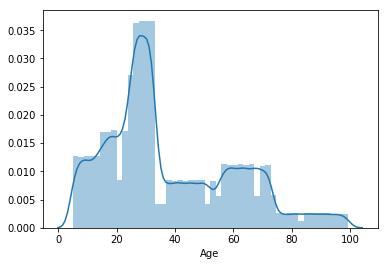

In [24]:
#Plot age distribution
sns.distplot(Total_data.Age)

### 5) Suicide data - examine and compared with Irish population

In [25]:
#Filter dataset based on suicides
SuicideData = Total_data.loc[Total_data['Suicide'] == 1]
#Print first five rows
pd.DataFrame.head(SuicideData) 

,Age,Sex,Suicide,Marital_Status
875,20,m,1,1.0
6066,21,f,1,0.0
10146,24,m,1,1.0
10242,22,m,1,1.0
30218,16,m,1,0.0


In [26]:
#Get descriptive statistics on data
SuicideData.describe() 

,Age,Suicide,Marital_Status
count,59.00000,59.0,59.000000
mean,39.79661,1.0,0.423729
std,18.71914,0.0,0.498390
min,15.00000,1.0,0.000000
25%,25.50000,1.0,0.000000
50%,31.00000,1.0,0.000000
75%,61.00000,1.0,1.000000
max,73.00000,1.0,1.000000


C:\Users\Harvey Norman\Ana\Anaconda1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Harvey Norman\Ana\Anaconda1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<BarContainer object of 2 artists>

{'whiskers': [<matplotlib.lines.Line2D at 0x222a8c07048>,
 'caps': [<matplotlib.lines.Line2D at 0x222a8c08c18>,
 'boxes': [<matplotlib.patches.PathPatch at 0x222a8c06b38>,
 'medians': [<matplotlib.lines.Line2D at 0x222a8c0a978>,
 'fliers': [<matplotlib.lines.Line2D at 0x222a8c0b198>,
 'means': []}

[Text(0,0,'Males'), Text(0,0,'Females')]

AttributeError: 'DataFrame' object has no attribute 'Marital_status'

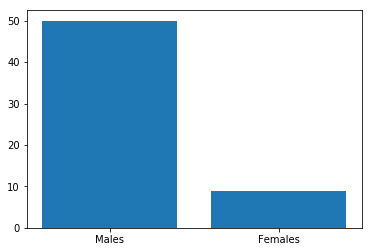

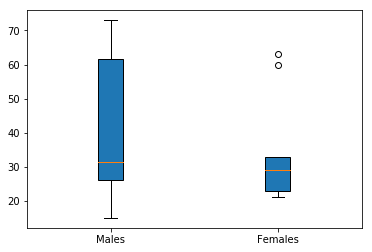

In [46]:
# Convert data type
SuicideData['Age'] = SuicideData.Age.astype(int)
SuicideData['Suicide'] = SuicideData.Suicide.astype(int) 

# Difficulty using this data with seaborn, so used Matplotlib instead.
# Seperate data in males and females.
SuicideData_male = SuicideData.loc[SuicideData['Sex'] == 'm'] 
SuicideData_female = SuicideData.loc[SuicideData['Sex'] == 'f']

# Bar graph of how many males and females.
fig = plt.figure()
ax = plt.axes()
plt.bar(["Males","Females"],[len(SuicideData_male.Age),len(SuicideData_female.Age)])
# Create box plot comparing of Ages for males and females
fig = plt.figure()
ax = plt.axes()
plt.boxplot([SuicideData_male.Age,SuicideData_female.Age],patch_artist=True)
ax.set_xticklabels(['Males', 'Females'])

# Create percentage single for males and females 
per_male_suicide=100 * len(SuicideData_male)/len(SuicideData)
#print(float(per_male_suicide))
per_female_suicide=100 * len(SuicideData_female)/len(SuicideData) 
#print(float(per_female_suicide)) 

x = SuicideData.Marital_status ==1 

print(len(x))
per_male_suicide=100 * len(SuicideData.Mat)/len(SuicideData)

84.7457627118644
15.254237288135593


### Bar graph and boxplots - Suicide Data 
---------------------------------------------

The bar graph above displays the 59 people that committed suicide based on the simulated data.

When interpreting the graph you can see that 50 of those that committed suicide were males and 9 were females. 
The CSO figures based on 2014 data, reported that 82% of all suicides in Ireland were Male and 18% were Female [7].We can conclude that the simulated data for gender and suicide rates, is representative of the suicide figures reported by the CSO.

The bargraph displays the median age for females committing suicide is 29 years and it is 32 years for males.

## Implot - Suicide simulated data - Age & Sex variables analyised
----------------------------------------------------------------------------------------------

The graph below displays that Males and Females that commit suicide are most likely to be between the ages of 20-34 years and between 60-74 years. 

In [ ]:
vis7 = sns.lmplot(data = SuicideData, x = "Marital_Status", y = "Age",fit_reg=False, hue = "Sex",size = 5, aspect=1, scatter_kws = {'s':200}, )

Swarmplot - Suicide simulated data - Marital Status analyised
---------------------------------------------------------------------------------------------
The swarmplot below displays the 59 people that committed suicide based on the simulated data, their sex and marital status. 

The plot also displays that the majority of Females that commited suicide are likely to have a marital status of not married. According to the national suicide research foundation figures, 40% of the Females that committed suicide where married [3].

The martial status of the males that commited suicide is 50% married and 50% single.It is relativly inline with the national suicide findings as they have found that 60% of Males that committed suicide were not married.

In [ ]:
sns.swarmplot(x="Sex", y="Marital_Status",data=SuicideData)

### References 
-----------------------------------------------------------------------------------------------------------------------
1. National Suicide Research Foundation - https://www.nsrf.ie/statistics/suicide/
1. Who suicide statistics - https://www.kaggle.com/szamil/who-suicide-statistics
2. National Suicide Research Foundation - https://www.nsrf.ie/statistics/suicide/ 
3. The Statistics Portal - https://www.statista.com/statistics/376889/average-age-of-the-population-in-ireland/ 
4. Search term - Add headings to dataframe https://stackoverflow.com/questions/34659105/adding-column-headers-to-pandas-dataframe-but-nans-all-the-data-even-though-h/34659161)  

6. Indexing,Slicing & subsetting - https://datacarpentry.org/python-ecology-lesson/03-index-slice-subset/ 
7. HSE National Office for Suicide Prevention  - https://www.hse.ie/eng/services/list/4/mental-health-services/nosp/research/reports/official-suicide-statistics-for-2014.pdf



### Search Terms 
----------------------------------------------------------------------------------------------------------------------
1. 1D -2D array - https://stackoverflow.com/questions/12575421/convert-a-1d-array-to-a-2d-array-in-numpy 
2. Concatenate Date -  
3. Simulating Data datacamp - https://campus.datacamp.com/courses/statistical-simulation-in-python/probability-data-generation-process?ex=14 
4. Changing datatypes - https://www.ritchieng.com/pandas-changing-datatype/ & http://pbpython.com/pandas_dtypes.html
5. Statistica (Mean Irish population)- https://www.statista.com/statistics/376889/average-age-of-the-population-in-ireland/
